**Credit Card Fraud Detection Project**

Introduction:- One of the biggest issues facing financial instituations globally today is credit card theft. As e-commerce, mobile banking, and online transactions have grown in popularity, scammers have created increasingly complex methods to take advantage of holes in payments systems. Accurately and promptly identifying fraudulent transactions is essential for safeguarding financial instituations and consumers alike. The goal of this project is to create a machine learning-based system that can instantly analyze transaction data and spot questionable activity before it causes financial harm.

Business Problem:- Every year credit card fraud costs banks and financial service providers billions of dollars. Conventional rule-based system may prohibit valid transactions and frequently fall behind in responding to changing fraud tendencies, which leaves customers unhappy. The business problem is to design an effective fraud detection system that:-


1.   Reduces the amount of money lost as a result of fraud.
2.   Increases client trust by safeguarding accounts.
1.   Minimizes false positives to avoid needlessy rejecting legitimate transactions.
2.   Makes use of data-driven models to adjust to novel fraud tactics.





Statement of problem:- using transaction features such transaction amount, merchant, time, location and device information, this project aims to develop and deploy a real-time credit card fraud detection system. The system ought to make use of machine learning methods in order to:-


1.   Make an accurate distinction between transactions that are fraudulent and those that are lawful.
2.   Manage data that is extremely unbalanced (because fraudulent incidents are infrequent)
1.   To faciliate in the moment decision making offer predictions with little delay.






In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [3]:
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb



In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [4]:
pd.set_option('display.max_columns', 100)
RFC_METRIC = 'gini' # It is used for RandomForrestClassifier
NUM_ESTIMATORS = 100 # It is used for RandomForrestClassifier
CAT_DEPTH = 8 # It is used for CatBoostClassifier
ADABOOST_EST = 50 # It is used for AdaBoostClassifier
NO_JOBS = 4 # It is used for RandomForrestClassifier

# Train / validation / Test split
#Validation
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # simple test using train_test_split

#Cross-Validation
NUMBER_KFOLDS = 5 # Number of folds in cross-validation

RANDOM_STATE = 2018 # random state for all techniques
EARLY_STOP = 50
OPT_ROUNDS = 1000 # To be adjusted based on best validation rounds
VERBOSE_EVAL = 50

In [5]:
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
data_df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# Check the data How many rows and columns?
print("Credit Card Fraud Detection data :- Rows",data_df.shape[0],"Columns",data_df.shape[1])

Credit Card Fraud Detection data :- Rows 284807 Columns 31


In [7]:
# describe your data
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# To check the NULL values
print(data_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Luckly therefore there is no missing values in the entire dataset.
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [10]:
# Print the columns
print(data_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
data_df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [12]:
# Summary of our data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data Unbalance:-** Let's check data unbalance with respect with target value

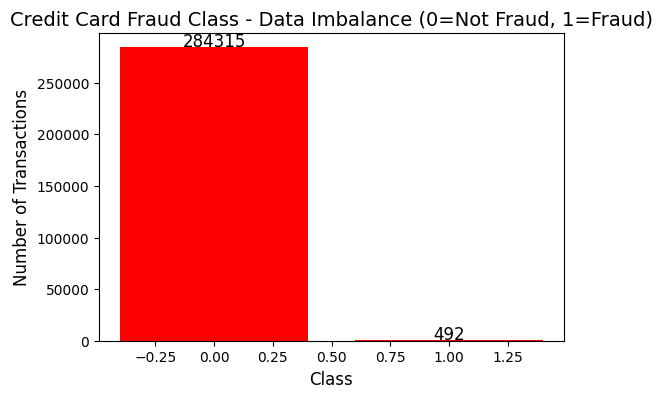

In [13]:

def plot_class_balance_bar_mat(data, target_col="Class"):
    # Prepare the data (same as your Plotly version)
    temp = data[target_col].value_counts()
    df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

    # Create the bar chart
    plt.figure(figsize=(6,4))
    bars = plt.bar(df['Class'], df['values'], color='red')

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 500, yval, ha='center', fontsize=12)

    # Titles and labels
    plt.title("Credit Card Fraud Class - Data Imbalance (0=Not Fraud, 1=Fraud)", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Transactions", fontsize=12)
    plt.show()

# Example usage
plot_class_balance_bar_mat(data_df, target_col="Class")


Just 492 transactions are fraudulent. This indicates that there is a significant imbalance in the data with regard to the target variable, class.

**Data Exploration**

Transactions in time density

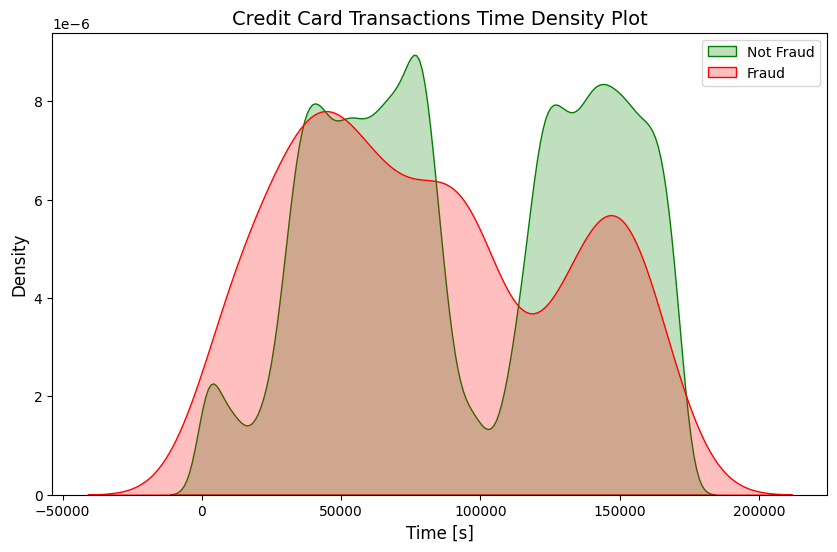

In [14]:
# Separate transactions by class
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

plt.figure(figsize=(10,6))

# Plot KDEs with updated fill parameter
sns.kdeplot(class_0, label='Not Fraud', fill=True, color='green')
sns.kdeplot(class_1, label='Fraud', fill=True, color='red')

plt.title('Credit Card Transactions Time Density Plot', fontsize=14)
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


Compared to legitimate transactions, fraudulent transactions are more evenly dispersed in terms of time, including the low genuine transaction times, which occur at night in the European time zone.

Let's take a closer look at the temporal distribution for both groups and the hourly average of transaction count and amount. We presume that the time unit is second based on the observation of the time distribution of transactions.

In [15]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x/3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.head()
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Count', 'Sum', 'Mean', 'Median', 'Var']
df.head(20)

,Hour,Class,Min,Max,Count,Sum,Mean,Median,Var
0,0.0,0,0.00,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.00,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.00,4002.88,1555,106989.39,68.803466,17.900,45355.430437
5,2.0,1,1.00,1809.68,21,1829.78,87.132381,1.000,155776.441219
6,3.0,0,0.00,1903.26,1808,94086.79,52.039154,15.950,16741.786661
7,3.0,1,0.00,179.66,13,220.05,16.926923,1.000,2457.208190
8,4.0,0,0.00,2126.13,1076,79050.36,73.466877,15.950,24416.863654
9,4.0,1,1.00,766.36,6,790.26,131.710000,3.860,96679.482040


Bar charts that display the overall transaction value for each hour of the day, broken down by transaction class, are displayed side by in the figure.

Chart on the left :- Not Fraud (Class 0):

1.   Shows the total number of valid (non-fraudulent) transactions that occure per hour.
2.   Peaks indicate times of significant card usage, with the majority of transactions taking place during business hours or during the day.

1.   The dataset's number and total amount are dominated by typical transactions, as shown by the green bars.

Chart on the Right (Class 1):

1.   Displays the total number of fraudulent transactions that occur per hour.
2.   shorter red bars indicate that the volume of fraudulent activity is significantly lower than of non-fraudulent transactions.








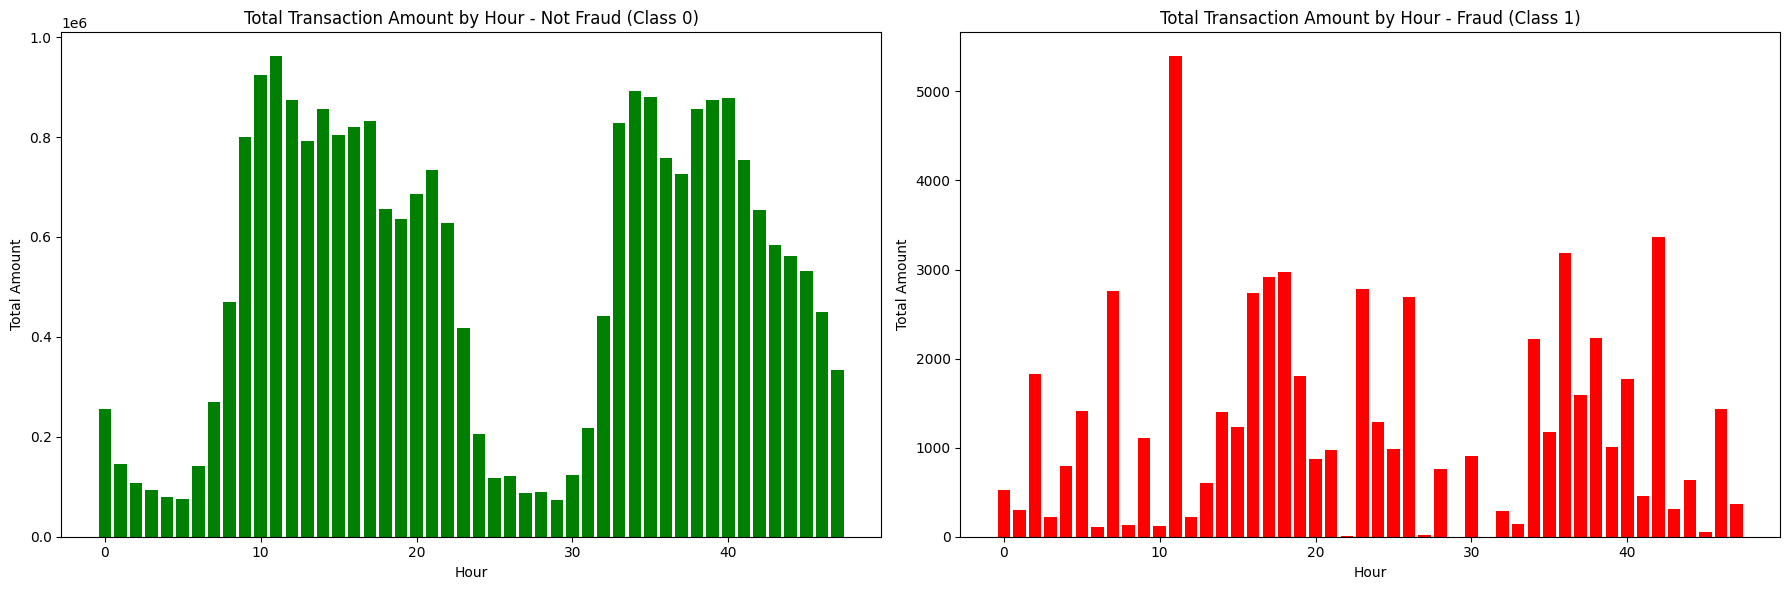

In [16]:

# Pivot data: sum of amounts by hour for Class 0 and Class 1 separately
pivot_0 = df[df['Class']==0].groupby('Hour')['Sum'].sum()
pivot_1 = df[df['Class']==1].groupby('Hour')['Sum'].sum()

# Plotting two separate bar charts
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

# Class 0: Not Fraud
ax1.bar(pivot_0.index, pivot_0.values, color='green')
ax1.set_title("Total Transaction Amount by Hour - Not Fraud (Class 0)")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Total Amount")

# Class 1: Fraud
ax2.bar(pivot_1.index, pivot_1.values, color='red')
ax2.set_title("Total Transaction Amount by Hour - Fraud (Class 1)")
ax2.set_xlabel("Hour")
ax2.set_ylabel("Total Amount")

plt.tight_layout()
plt.show()


The line graphs, which are divided into Not Fraud (class 0) and fraud (class 1), display the quantity of transactions by hour of the day.

1.   Normal transaction activity, which peaks during active hours and follows daily patterns, is depicted in the class 0 (green) graphic.
2.   Fraudulent transactions are represented by the class 1(red)plot; these transactions are less common and show more irregularities over time
1.   It is evident from this comparison that fraudulent activity is far less common and does not adhere to same hourly patterns as regular transactions.








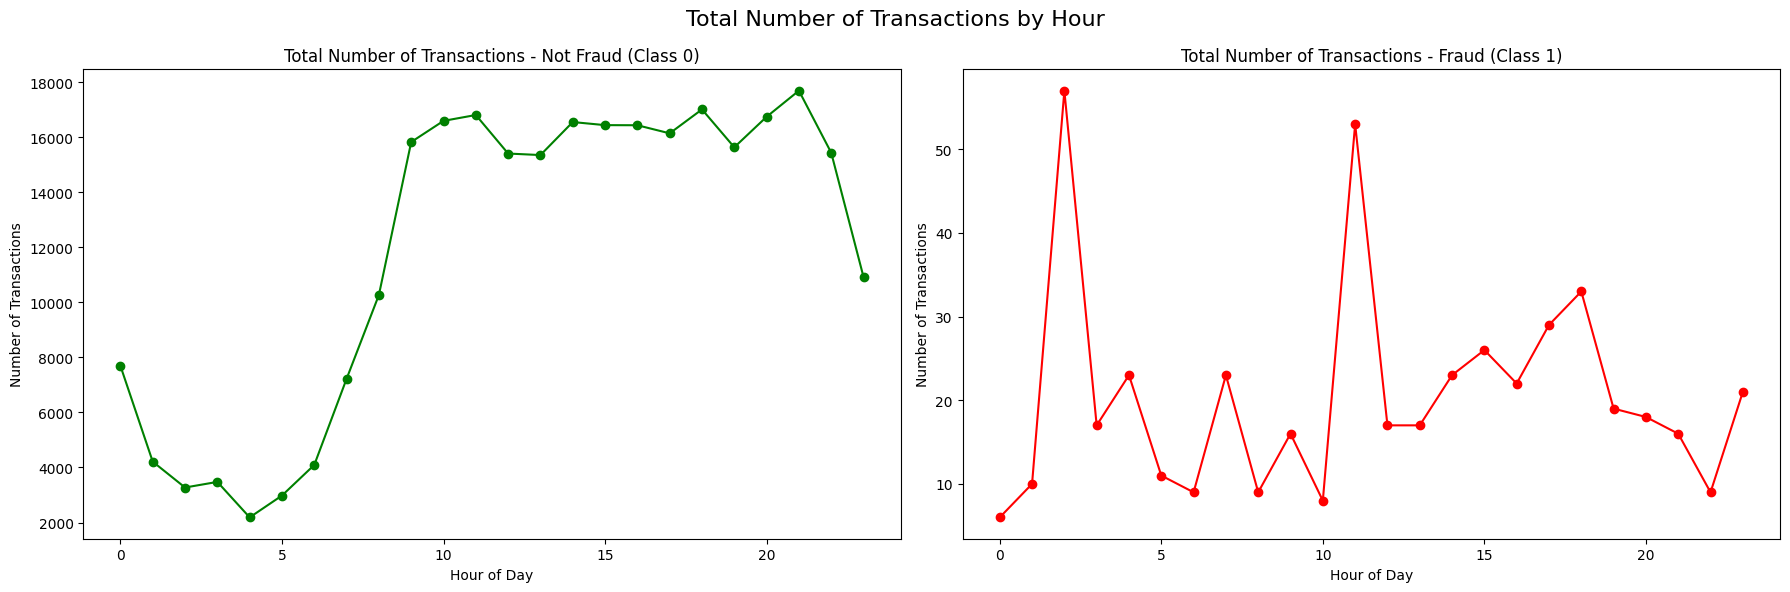

In [17]:

# Create Hour column from Time (dataset is in seconds, convert to hours)
data_df['Hour'] = (data_df['Time'] // 3600) % 24

# Count transactions per hour for each class
transactions_per_hour_0 = data_df[data_df['Class'] == 0]['Hour'].value_counts().sort_index()
transactions_per_hour_1 = data_df[data_df['Class'] == 1]['Hour'].value_counts().sort_index()

# Plot side-by-side line graphs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Not Fraud (Class 0)
ax1.plot(transactions_per_hour_0.index, transactions_per_hour_0.values, color='green', marker='o')
ax1.set_title("Total Number of Transactions - Not Fraud (Class 0)")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Number of Transactions")

# Fraud (Class 1)
ax2.plot(transactions_per_hour_1.index, transactions_per_hour_1.values, color='red', marker='o')
ax2.set_title("Total Number of Transactions - Fraud (Class 1)")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Number of Transactions")

plt.suptitle("Total Number of Transactions by Hour", fontsize=16)
plt.tight_layout()
plt.show()


These graphs, which are divided into fraud (class 1) and not fraud (class 0), display the average transaction amount every hour.

1.   The average amounts for class 0 (green) are comparatively constant, indicating typical spending trends.
2.   The average values for class 1(red) fluctuate more erratically, with sporadic surges signifying more valuable fraudulent transactions.

This demonstrate that, in contrast to ordinary transactions, fraudulent ones frequently entail bigger or irregular sums.



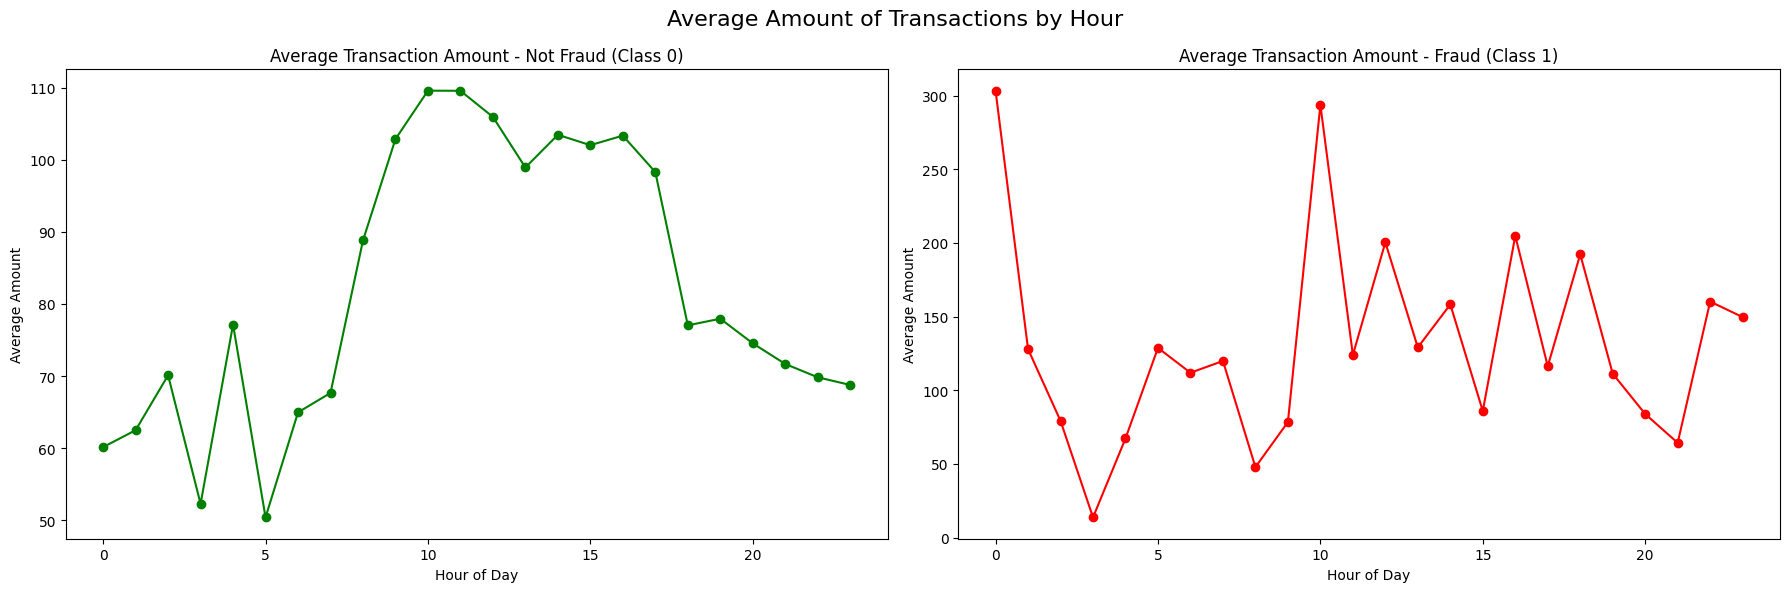

In [18]:
# Average amount of transactions
# Create Hour column from Time (dataset is in seconds, convert to hours)
data_df['Hour'] = (data_df['Time'] // 3600) % 24

# Compute average amount per hour for each class
mean_per_hour_0 = data_df[data_df['Class'] == 0].groupby('Hour')['Amount'].mean()
mean_per_hour_1 = data_df[data_df['Class'] == 1].groupby('Hour')['Amount'].mean()

# Plot side-by-side line graphs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# Not Fraud (Class 0)
ax1.plot(mean_per_hour_0.index, mean_per_hour_0.values, color='green', marker='o')
ax1.set_title("Average Transaction Amount - Not Fraud (Class 0)")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Average Amount")

# Fraud (Class 1)
ax2.plot(mean_per_hour_1.index, mean_per_hour_1.values, color='red', marker='o')
ax2.set_title("Average Transaction Amount - Fraud (Class 1)")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Average Amount")

plt.suptitle("Average Amount of Transactions by Hour", fontsize=16)
plt.tight_layout()
plt.show()


The largest transaction amount for each hour of the day is shown in the stacked bar chart, which is divided by transactions class. Fraud (class 1) is shown in red, and not fraud (class 0) is shown in green. The image clearly compares the distribution of high- value transactions over time by stacking the fraud amounts on top of the non-fraud amounts. It emphasizes that while fraudulent transactions are less common, they frequently cause notable surges at specific hours, while non-fraud transactions quantities are continously high over most hours. This aids in the comparision of fraudulent activity patterns and the identification of peak transaction times, which can be crucial for real-time-fraud detection tactics.

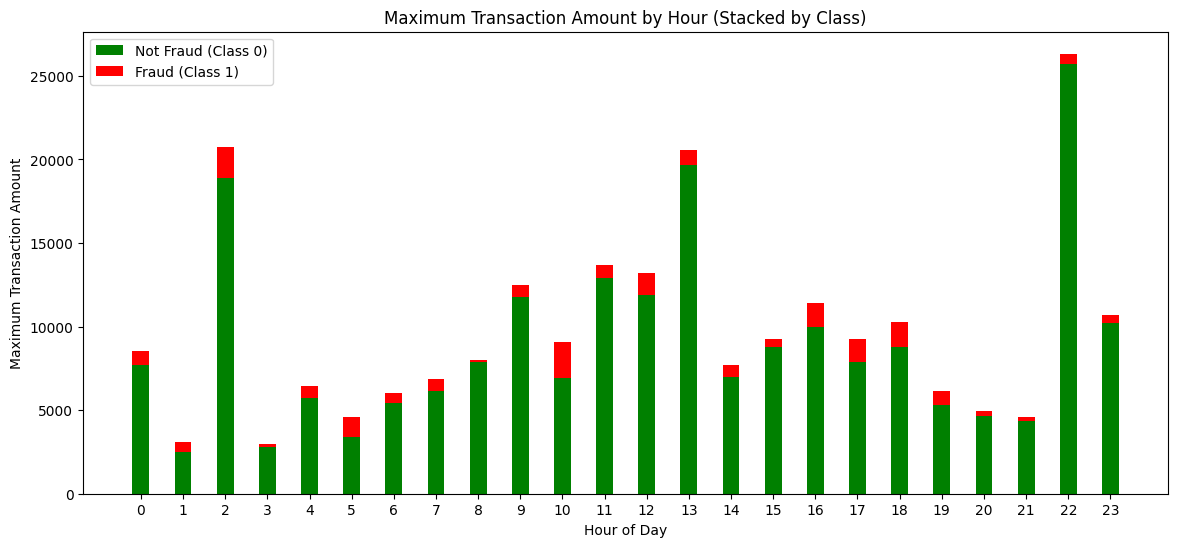

In [19]:
# maximum amount of transactions
# Compute maximum transaction amount per hour for each class
max_per_hour_0 = data_df[data_df['Class'] == 0].groupby('Hour')['Amount'].max()
max_per_hour_1 = data_df[data_df['Class'] == 1].groupby('Hour')['Amount'].max()

# Set up the bar width and positions
bar_width = 0.4
hours = np.arange(24)

# Plot stacked bars
plt.figure(figsize=(14,6))
plt.bar(hours, max_per_hour_0, width=bar_width, label='Not Fraud (Class 0)', color='green')
plt.bar(hours, max_per_hour_1, width=bar_width, bottom=max_per_hour_0, label='Fraud (Class 1)', color='red')

plt.xlabel('Hour of Day')
plt.ylabel('Maximum Transaction Amount')
plt.title('Maximum Transaction Amount by Hour (Stacked by Class)')
plt.xticks(hours)
plt.legend()
plt.show()


Minimum Amount of Transactions:-

1.   Hourly Comparison:- By class (Not Fraud vs Fraud), the graph display the minimum transaction amount for every hour of the day.
2.   Fraud vs Non-Fraud: To illustrate the proportionate imapct of fraud at each hour, green bars shown transactions that are not fraudulent, while red bars show fraudulent transactions stacked on top.
1.   Pattern Insights: While fraudulent transactions are rare, they can occasionally add noteworthy spikes, making it easier to detect hours with unsual activity. Most hours have consistently low non-fraud transactions.

    Hour  Min_Amount_Not_Fraud  Min_Amount_Fraud
0      0                   0.0              0.00
1      1                   0.0              1.00
2      2                   0.0              0.01
3      3                   0.0              0.00
4      4                   0.0              0.00
5      5                   0.0              1.00
6      6                   0.0              0.00
7      7                   0.0              3.76
8      8                   0.0              0.68
9      9                   0.0              0.00
10    10                   0.0              0.00
11    11                   0.0              0.00
12    12                   0.0              1.00
13    13                   0.0              0.00
14    14                   0.0              0.00
15    15                   0.0              0.00
16    16                   0.0              0.00
17    17                   0.0              0.00
18    18                   0.0              0.00
19    19            

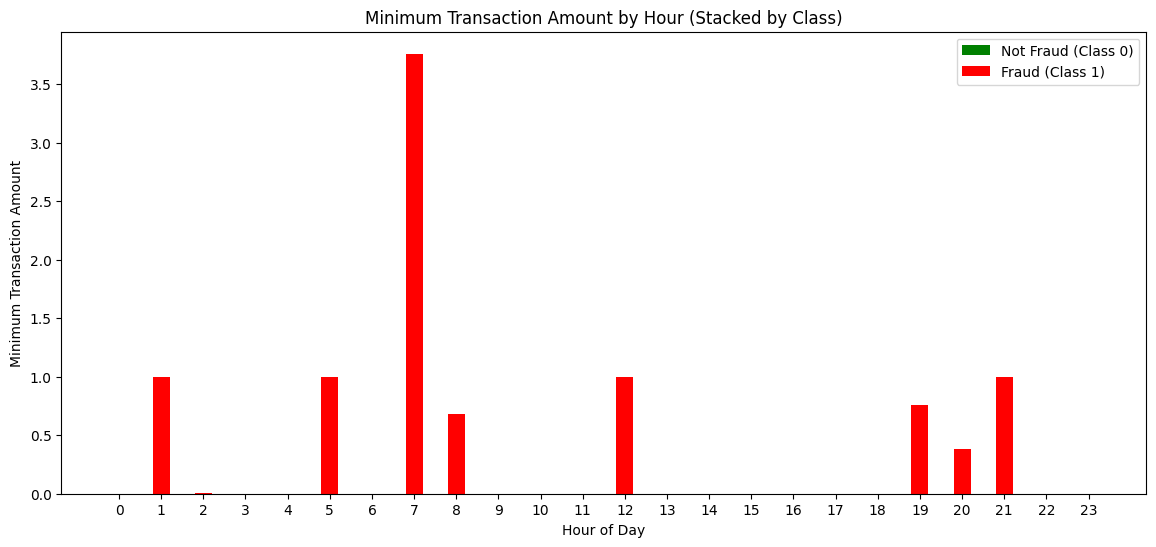

In [20]:
# Minimum Amount of Transactions
# Compute minimum transaction amount per hour for each class
min_per_hour_0 = data_df[data_df['Class'] == 0].groupby('Hour')['Amount'].min()
min_per_hour_1 = data_df[data_df['Class'] == 1].groupby('Hour')['Amount'].min()

# Print the data
min_data_df = pd.DataFrame({
    'Hour': np.arange(24),
    'Min_Amount_Not_Fraud': min_per_hour_0.values,
    'Min_Amount_Fraud': min_per_hour_1.values
})
print(min_data_df)

# Set up the bar width and positions
bar_width = 0.4
hours = np.arange(24)

# Plot stacked bars
plt.figure(figsize=(14,6))
plt.bar(hours, min_per_hour_0, width=bar_width, label='Not Fraud (Class 0)', color='green')
plt.bar(hours, min_per_hour_1, width=bar_width, bottom=min_per_hour_0, label='Fraud (Class 1)', color='red')

plt.xlabel('Hour of Day')
plt.ylabel('Minimum Transaction Amount')
plt.title('Minimum Transaction Amount by Hour (Stacked by Class)')
plt.xticks(hours)
plt.legend()
plt.show()


Median amount of transaction:-
1.   Median Transaction Analysis:- To provide a reliable indicator of central tendency that is less impacted by extreme values, the algorithm computes the median transaction amount per hour independently for fraudulent (class 1) and non- fraudulent (class 0) transaction.
2.   Comparison Across classes: The percentage of transaction amounts provided by fraudulent versus non-fraudulent transactions is easily visible where the median amounts for each hour are added up and displayed in a pie chart.
1.   Business Insight:- By emphasizing the small but considerable percentage of fraud compared to typical transactions, this visualization aids financial analysts in understanding the relative impact of fraudulent transactions on overall transaction amounts.






Median transaction amounts per hour by class:
    Hour  Median_Amount_Not_Fraud  Median_Amount_Fraud
0      0                   12.140              230.240
1      1                   18.965               45.725
2      2                   17.450                1.000
3      3                   15.950                1.000
4      4                   15.950                2.280
5      5                   11.850                1.000
6      6                   11.850                3.120
7      7                   15.000               99.990
8      8                   25.950               30.300
9      9                   31.000               16.710
10    10                   33.000               26.155
11    11                   32.550               39.450
12    12                   29.990                2.000
13    13                   27.520                7.580
14    14                   26.540               99.990
15    15                   27.500                3.245
16    16           

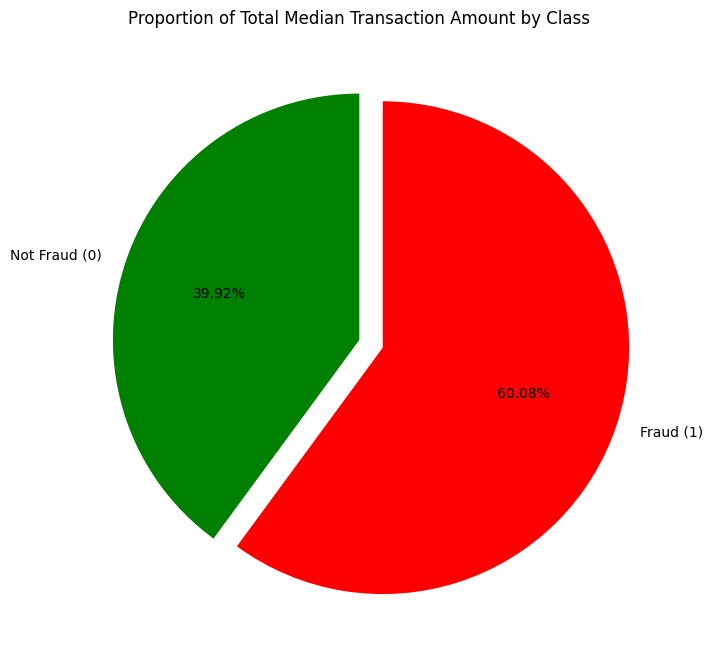

In [21]:
# Median amount of transactions
# Compute median transaction amount per hour for each class
median_per_hour_0 = data_df[data_df['Class'] == 0].groupby('Hour')['Amount'].median()
median_per_hour_1 = data_df[data_df['Class'] == 1].groupby('Hour')['Amount'].median()

# Combine into a DataFrame
median_data_df = pd.DataFrame({
    'Hour': np.arange(24),
    'Median_Amount_Not_Fraud': median_per_hour_0.values,
    'Median_Amount_Fraud': median_per_hour_1.values
})

# Print median data per hour
print("Median transaction amounts per hour by class:")
print(median_data_df)

# Sum of median amounts across all hours for each class
total_median_0 = median_per_hour_0.sum()
total_median_1 = median_per_hour_1.sum()

# Print total medians
median_totals = pd.DataFrame({
    'Class': ['Not Fraud (0)', 'Fraud (1)'],
    'Total_Median_Amount': [total_median_0, total_median_1]
})
print("\nTotal median transaction amounts by class:")
print(median_totals)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    median_totals['Total_Median_Amount'],
    labels=median_totals['Class'],
    autopct='%1.2f%%',
    colors=['green','red'],
    startangle=90,
    explode=(0,0.1)
)
plt.title('Proportion of Total Median Transaction Amount by Class')
plt.show()


Descriptive Statistics and Initial Transaction Inspection

To comprehend their distributions, trends, and distinctions, we examine the transaction amounts for both fraudulent (Class 1) and non-fraudulent (Class 0) transactions in this stage. Finding trends and anomalies that might guide modeling efforts makes this a crucial phase in the study of credit card fraud.

Non-Fraudulent Transaction Descriptive Statistics (Class 0)
1.   Count: 284,315 transactions — this indicates a notable class imbalance and demonstrates that the vast bulk of the collection is made up of valid transactions.

2.  The average transaction amount is 88.29, which is not very tiny but very low.
1.   The wide range of transaction quantities (standard deviation: 250.11) indicates that some transactions are very high, but the majority are tiny.  
2.   Minimum: 0 and Maximum: 25,691.Some transactions are very high, while 16 transactions have little value.


Observation: The majority of non-fraud transactions are tiny in value, but occasionally there are very large transactions that can affect statistical measurements such as the mean.


Fraudulent Transaction Descriptive Statistics (Class 1)
1.   
Count: 492 transactions; frauds are incredibly uncommon in comparison to non-frauds, demonstrating the class imbalance that is common in datasets containing fraud.
2.   Average: 122.21 — the average of fraudulent transactions is somewhat greater than that of non-fraudulent ones.
1.   High variability is seen; some fraudulent transactions are significantly larger than the average fraudulent transaction (standard deviation: 256.68).
2.   Min and Max: 0 and 2,125.87 – most fraudulent transactions are extremely modest, although there are a few high-value ones.


Insight: Although most fraudulent transactions involve modest sums of money, there are a few major frauds that have the potential to result in enormous financial losses.


In [22]:

# Create a temporary DataFrame with Amount and Class
tmp = data_df[['Amount','Class']].copy()

# Separate transactions by class
class_0 = tmp.loc[tmp['Class'] == 0, 'Amount']
class_1 = tmp.loc[tmp['Class'] == 1, 'Amount']

# Describe each class
desc_class_0 = class_0.describe()
desc_class_1 = class_1.describe()

# Print descriptive statistics
print("Descriptive Statistics - Class 0 (Not Fraud):")
print(desc_class_0)
print("\nDescriptive Statistics - Class 1 (Fraud):")
print(desc_class_1)

# Print the first 10 transaction amounts for each class
print("\nFirst 10 transaction amounts - Class 0 (Not Fraud):")
print(class_0.head(10).to_string(index=False))
print("\nFirst 10 transaction amounts - Class 1 (Fraud):")
print(class_1.head(10).to_string(index=False))


Descriptive Statistics - Class 0 (Not Fraud):
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Descriptive Statistics - Class 1 (Fraud):
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

First 10 transaction amounts - Class 0 (Not Fraud):
149.62
  2.69
378.66
123.50
 69.99
  3.67
  4.99
 40.80
 93.20
  3.68

First 10 transaction amounts - Class 1 (Fraud):
  0.00
529.00
239.93
 59.00
  1.00
  1.00
  1.00
  1.00
  1.00
  1.00


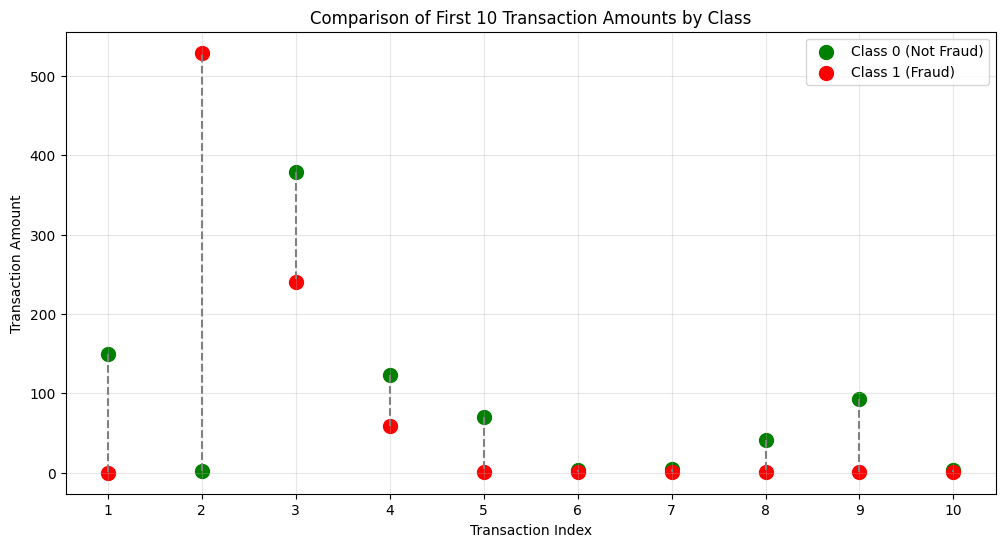

In [23]:

# Get first 10 transactions
first_10_class_0 = class_0.head(10).values
first_10_class_1 = class_1.head(10).values
indices = np.arange(1, 11)

plt.figure(figsize=(12,6))

# Dumbbell plot
plt.scatter(indices, first_10_class_0, color='green', label='Class 0 (Not Fraud)', s=100)
plt.scatter(indices, first_10_class_1, color='red', label='Class 1 (Fraud)', s=100)

# Draw connecting lines
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [first_10_class_0[i], first_10_class_1[i]], color='gray', linestyle='--')

plt.title('Comparison of First 10 Transaction Amounts by Class')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.xticks(indices)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [24]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [25]:
class_1.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


We concentrated on examining fraudulent credit card transactions throughout this phase in order to comprehend how they behave over time. To improve interpretability, the transaction time—which was initially recorded in seconds—was converted to hours, and the dataset was filtered to only include transactions classified as fraudulent (Class = 1). We were able to spot trends and patterns over the 48-hour time frame that the dataset spanned thanks to this preprocessing procedure.

The distribution and size of fraudulent transactions were examined using a variety of visualizations. While boxplots and violin plots emphasized the variability, medians, and quartiles of transaction amounts per hour, scatter plots displayed individual transaction amounts over time. Density plots were also used to reveal areas where fraudulent activity was concentrated, providing a smoothed, heatmap-like view of patterns that are less obvious in raw scatter plots.

Several conclusions were drawn from these investigations. Although there are some extreme outliers, fraudulent transactions typically have smaller amounts than legitimate ones. Higher concentrations of fraud are observed at particular hours, indicating risky times that can benefit from more careful observation. Overall, this stage laid the foundation for more focused fraud detection techniques by combining descriptive statistics and visualizations to paint a clear picture of the times and methods of fraudulent transactions.


        Time      Hour  Amount
541    406.0  0.112778    0.00
623    472.0  0.131111  529.00
4920  4462.0  1.239444  239.93
6108  6986.0  1.940556   59.00
6329  7519.0  2.088611    1.00
6331  7526.0  2.090556    1.00
6334  7535.0  2.093056    1.00
6336  7543.0  2.095278    1.00
6338  7551.0  2.097500    1.00
6427  7610.0  2.113889    1.00


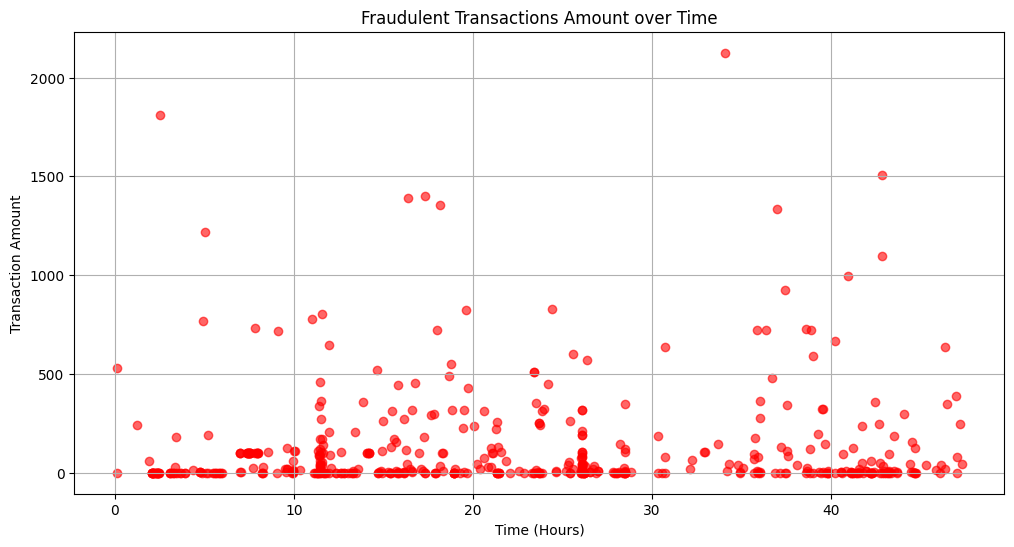

In [26]:
# The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.
#Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

# Filter only fraudulent transactions
fraud_df = data_df[data_df['Class'] == 1].copy()

# Convert Time from seconds to hours (0 to 48)
fraud_df['Hour'] = fraud_df['Time'] / 3600

# Print first 10 entries to check
print(fraud_df[['Time','Hour','Amount']].head(10))

# Scatter plot of fraudulent transaction amounts over time
plt.figure(figsize=(12,6))
plt.scatter(fraud_df['Hour'], fraud_df['Amount'], color='red', alpha=0.6)
plt.title('Fraudulent Transactions Amount over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


**Feature Engineering**

Time-Based Feature Engineering:-
In order to improve the interpretability and utility of the raw time variable (measured in seconds) for the model, we craeted features from it.

Time components extracted: Hour, Minute, and Second were obtained from raw seconds

Insted of treating time as continous quantity, this transfrmation enables the model to capture patterns associated with certain time intervals.

Part of day is a categorial feature that was created. We divided the day into four sections using the extracted hours; mornings (6-12 hours), afternoon (12-18 hours), evening (18-24 hours), and night (0-6 hours).
This facilitates the analysis and modeling of behavioral patterns associated with cycles of human activity.

IMPORTANCE:-


1.   Enhances interpretability: The derived features offer distinct insights into the timing of events, as opposed to raw seconds, which are challenging to understand.
2.   Records the daily trends: The time of day affects a number of activities, including user activity, sales, transactions, and energy use. We enable the model to learn these cyclic trends by classifying time.

1.   enables downstream analysis: By allowing analysts and decision-makers to view performance in real time throughout the day, this tool supports business insights and strategy.
2.   Preparing data for machine learning: Predictive accuracy is increased by models' superior handling of categorical variables, such as Part_of_day, over raw timestamps.





In [29]:
# Time-based Features
# Example data
data_df = pd.DataFrame({'Time': [0, 360, 750, 1230, 1800, 2345]})  # Time in seconds

# Extract hours, minutes, seconds
data_df['Hour'] = (data_df['Time'] // 3600) % 24
data_df['Minute'] = (data_df['Time'] // 60) % 60
data_df['Second'] = data_df['Time'] % 60

# Categorize part of the day
data_df['Part_of_day'] = pd.cut(data_df['Hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'], right=False)

# Print the DataFrame
print(data_df)


   Time  Hour  Minute  Second Part_of_day
0     0     0       0       0       Night
1   360     0       6       0       Night
2   750     0      12      30       Night
3  1230     0      20      30       Night
4  1800     0      30       0       Night
5  2345     0      39       5       Night


Amount-Based Feature Engineering

To better depict its distribution and lessen skewness, we created characteristics from the transaction amount variable in addition to time-based alterations.

Original Amount: The transaction or activity amount is represented by the Amount column in the dataset.
Raw amounts frequently vary greatly (little everyday transactions vs. very large ones, for example).

Log Transformation of Amount: To compress large values and disperse smaller ones, we used a logarithmic transformation (Amount_log = log(Amount + 1)).
Numerous machine learning methods gain from this since it lessens the impact of extreme outliers and brings the distribution closer to normal.

In [30]:
# Amount Based features
# Example data
data_df = pd.DataFrame({
    'Time': [0, 360, 750, 1230, 1800, 2345],  # Time in seconds
    'Amount': [10, 50, 100, 500, 1000, 5000]  # Example amounts
})

# Extract hours, minutes, seconds
data_df['Hour'] = (data_df['Time'] // 3600) % 24
data_df['Minute'] = (data_df['Time'] // 60) % 60
data_df['Second'] = data_df['Time'] % 60

# Categorize part of the day
data_df['Part_of_day'] = pd.cut(
    data_df['Hour'],
    bins=[0,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening'],
    right=False
)

# Log-transform Amount
data_df['Amount_log'] = np.log1p(data_df['Amount'])

# Print the DataFrame
print(data_df)


   Time  Amount  Hour  Minute  Second Part_of_day  Amount_log
0     0      10     0       0       0       Night    2.397895
1   360      50     0       6       0       Night    3.931826
2   750     100     0      12      30       Night    4.615121
3  1230     500     0      20      30       Night    6.216606
4  1800    1000     0      30       0       Night    6.908755
5  2345    5000     0      39       5       Night    8.517393


**Statistical Features from V1–V28**



In [31]:
# Statistical Features from V1–V28
data = {
    'Time': [0, 360, 750, 1230, 1800, 2345],
    'Amount': [10, 50, 100, 500, 1000, 5000]
}

# Add dummy V1-V28 columns
for i in range(1, 29):
    data[f'V{i}'] = np.random.randint(0, 100, size=6)

data_df = pd.DataFrame(data)

# Extract hours, minutes, seconds
data_df['Hour'] = (data_df['Time'] // 3600) % 24
data_df['Minute'] = (data_df['Time'] // 60) % 60
data_df['Second'] = data_df['Time'] % 60

# Categorize part of the day
data_df['Part_of_day'] = pd.cut(
    data_df['Hour'],
    bins=[0,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening'],
    right=False
)

# Log-transform Amount
data_df['Amount_log'] = np.log1p(data_df['Amount'])

# Row-wise statistics for V1-V28
data_df['V_mean'] = data_df.loc[:, 'V1':'V28'].mean(axis=1)
data_df['V_std'] = data_df.loc[:, 'V1':'V28'].std(axis=1)
data_df['V_max'] = data_df.loc[:, 'V1':'V28'].max(axis=1)
data_df['V_min'] = data_df.loc[:, 'V1':'V28'].min(axis=1)

# Print the final DataFrame
print(data_df)


   Time  Amount  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
0     0      10  66  93  59  62  92  30  34  30  98   57   19   49   40    1   
1   360      50  62  31  36  93  33  69  64  60  81   37   81   20   43   78   
2   750     100   5  26  67  78  39  27  83   1   1   78   83   92   99   84   
3  1230     500  82   7  56  63  57  46  61  49  11    2   28   97   67   73   
4  1800    1000  87  74  92  64  25  37  97  91  97   98   90   66   73   10   
5  2345    5000  21  34  54  66  43  78  97  89  70   68    3   73   11   51   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  Hour  \
0   70   33   11   67   29   71   27   77   93   22   23   27   59   48     0   
1   42   64   27   68   15   38   77   34   84   16   66    3   45   47     0   
2   69   32    4   33    7   97   78   53   15   39   57   50   87   57     0   
3   47   71    1   16   58   40   17   68   96   97   14   31   77   16     0   
4   10   90   15   65    0   26   

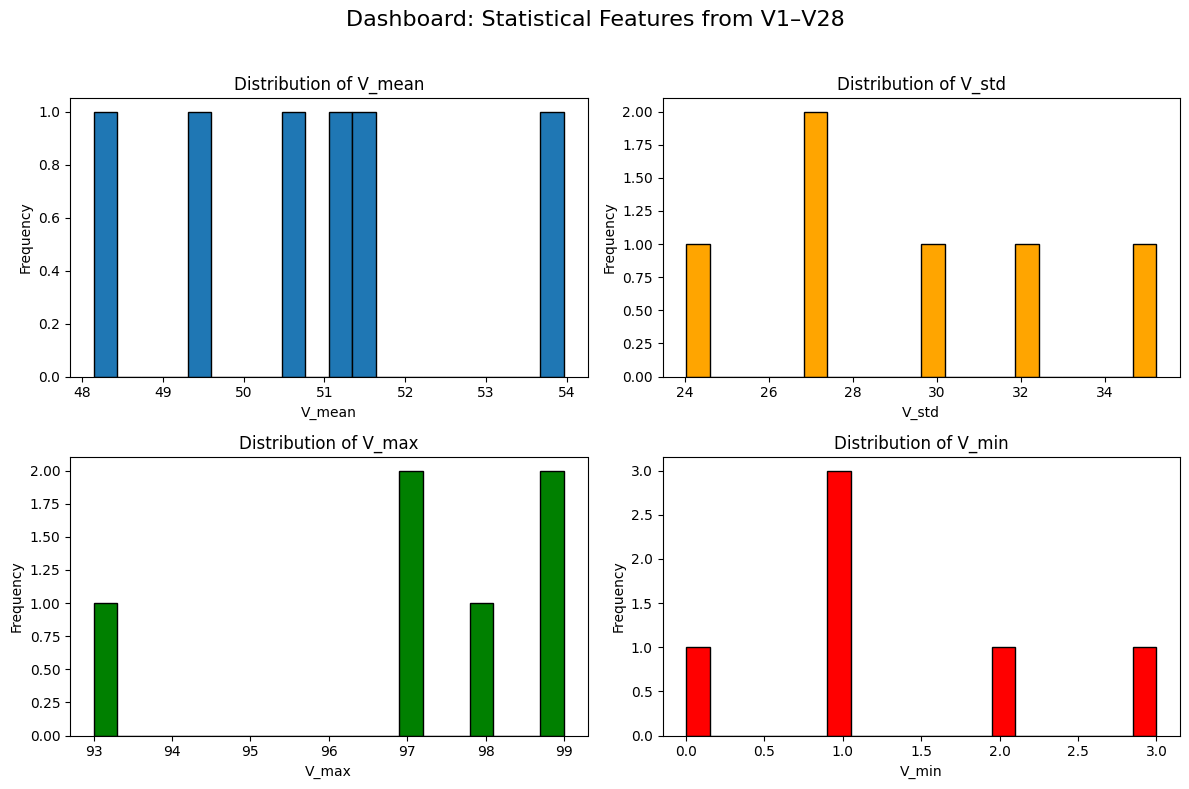

/tmp/ipython-input-3790576729.py:41: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



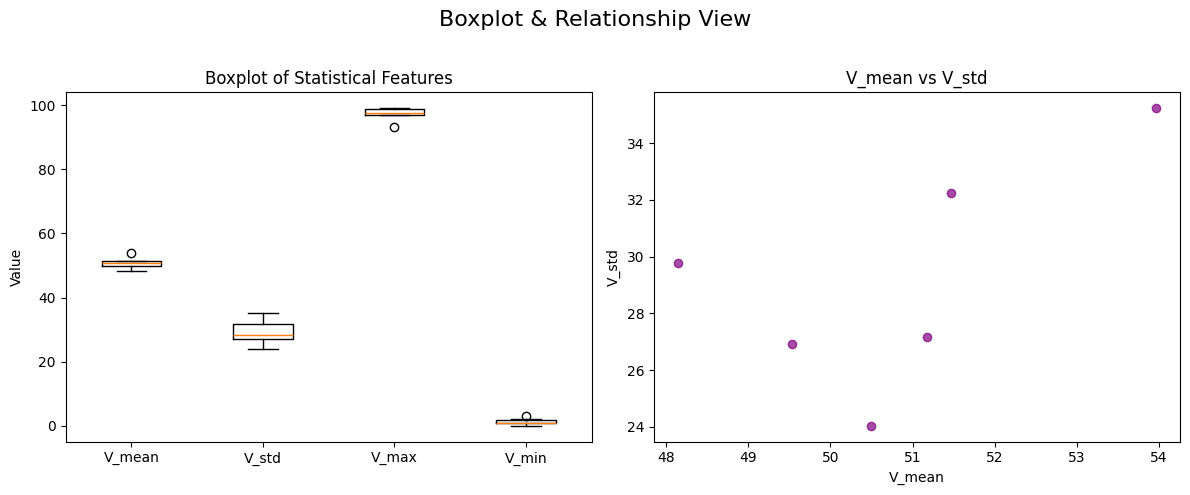

In [32]:
# Statistical Features from V1–V28
# Select the statistical feature columns
stats_cols = ['V_mean', 'V_std', 'V_max', 'V_min']

# Create a dashboard with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Dashboard: Statistical Features from V1–V28", fontsize=16)

# Histogram for V_mean
axes[0,0].hist(data_df['V_mean'], bins=20, edgecolor='black')
axes[0,0].set_title("Distribution of V_mean")
axes[0,0].set_xlabel("V_mean")
axes[0,0].set_ylabel("Frequency")

# Histogram for V_std
axes[0,1].hist(data_df['V_std'], bins=20, edgecolor='black', color='orange')
axes[0,1].set_title("Distribution of V_std")
axes[0,1].set_xlabel("V_std")
axes[0,1].set_ylabel("Frequency")

# Histogram for V_max
axes[1,0].hist(data_df['V_max'], bins=20, edgecolor='black', color='green')
axes[1,0].set_title("Distribution of V_max")
axes[1,0].set_xlabel("V_max")
axes[1,0].set_ylabel("Frequency")

# Histogram for V_min
axes[1,1].hist(data_df['V_min'], bins=20, edgecolor='black', color='red')
axes[1,1].set_title("Distribution of V_min")
axes[1,1].set_xlabel("V_min")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Second dashboard: Boxplot + Scatter
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Boxplot & Relationship View", fontsize=16)

# Boxplot
axes[0].boxplot([data_df['V_mean'], data_df['V_std'], data_df['V_max'], data_df['V_min']],
                labels=['V_mean','V_std','V_max','V_min'])
axes[0].set_title("Boxplot of Statistical Features")
axes[0].set_ylabel("Value")

# Scatter plot: V_mean vs V_std
axes[1].scatter(data_df['V_mean'], data_df['V_std'], alpha=0.7, color='purple')
axes[1].set_title("V_mean vs V_std")
axes[1].set_xlabel("V_mean")
axes[1].set_ylabel("V_std")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In this step, the dataset was separated into numerical features (such as transaction amounts, time values, or statistical measures) and categorical features (such as part of the day or other group labels) based on their data types. This distinction is crucial because numerical variables can be directly used in mathematical computations and benefit from techniques like scaling, while categorical variables capture qualitative information and require encoding before being used in machine learning models. By identifying and separating these two feature types, we ensure that each is processed appropriately, which improves data quality, model performance, and interpretability.

In [33]:

# Example: assume data_df is your dataframe
# Select numerical features
num_features = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical features
cat_features = data_df.select_dtypes(include=['object', 'category']).columns.tolist()

print(" Numerical Features:")
print(num_features)

print("\n Categorical Features:")
print(cat_features)


 Numerical Features:
['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Hour', 'Minute', 'Second', 'Amount_log', 'V_mean', 'V_std', 'V_max', 'V_min']

 Categorical Features:
['Part_of_day']



1.   The dataset was first separated into numerical features (such as transaction amounts, time values, and derived statistical measures) and categorical features (such as part of the day or other group labels) based on their data types. This clear separation helps in understanding the structure of the data and ensures that each type of variable is handled appropriately.

2.   To validate this process, the lists of identified features were printed along with sample rows from both numerical and categorical data. This step provides a quick check to confirm that variables have been classified correctly, while also giving an early look at how the data is distributed across different types of features.

1.   This distinction is especially important for later preprocessing tasks, since numerical features usually undergo scaling, normalization, or statistical transformations, while categorical features require encoding techniques like one-hot or label encoding. By carrying out this step early, the dataset is made more organized, which improves the efficiency and effectiveness of subsequent feature engineering and machine learning model training.






In [34]:

# Select numerical features
num_features = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical features
cat_features = data_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("🔢 Numerical Features:")
print(num_features)
print("\nSample numerical data:")
print(data_df[num_features].head())

print("\n🔠 Categorical Features:")
print(cat_features)
print("\nSample categorical data:")
print(data_df[cat_features].head())


🔢 Numerical Features:
['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Hour', 'Minute', 'Second', 'Amount_log', 'V_mean', 'V_std', 'V_max', 'V_min']

Sample numerical data:
   Time  Amount  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
0     0      10  66  93  59  62  92  30  34  30  98   57   19   49   40    1   
1   360      50  62  31  36  93  33  69  64  60  81   37   81   20   43   78   
2   750     100   5  26  67  78  39  27  83   1   1   78   83   92   99   84   
3  1230     500  82   7  56  63  57  46  61  49  11    2   28   97   67   73   
4  1800    1000  87  74  92  64  25  37  97  91  97   98   90   66   73   10   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  Hour  \
0   70   33   11   67   29   71   27   77   93   22   23   27   59   48     0   
1   42   64   27   68   15

Mapping Categorical Values to Numerical Values for Correlation Matrix

In this step, all non-numerical columns were removed from the dataset to focus exclusively on numerical features, and a correlation matrix was computed to quantify the linear relationships between them. The correlation coefficient ranges from -1 to +1, where values close to +1 indicate strong positive correlation, values close to -1 indicate strong negative correlation, and values near 0 suggest little or no linear relationship. Computing this matrix provides valuable insight into how the numerical features interact with each other and helps in understanding the structure of the data.

To visualize these relationships more clearly, a heatmap was plotted, where the color intensity represents the strength and direction of the correlation. This visualization allows for quick identification of highly correlated features, which may indicate redundancy or multicollinearity. Such insights are crucial in feature engineering and model building, as they can guide decisions for dimensionality reduction, feature selection, or the creation of composite features, ultimately improving model performance and interpretability.

In [35]:

# Copy dataframe to avoid changing original
df_corr = data_df.copy()

# Map categorical to numeric
# Example: Part_of_day → {Night:0, Morning:1, Afternoon:2, Evening:3}
mapping = {'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}
df_corr['Part_of_day_num'] = df_corr['Part_of_day'].map(mapping)

# Drop the original categorical column for correlation
df_corr = df_corr.drop(columns=['Part_of_day'])

# Compute correlation matrix
corr_matrix = df_corr.corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                     Time    Amount        V1        V2        V3        V4  \
Time             1.000000  0.816383 -0.110325 -0.237804  0.377842 -0.385962   
Amount           0.816383  1.000000 -0.374031 -0.131912 -0.027643 -0.287854   
V1              -0.110325 -0.374031  1.000000  0.304760  0.193599 -0.276045   
V2              -0.237804 -0.131912  0.304760  1.000000  0.436154 -0.360413   
V3               0.377842 -0.027643  0.193599  0.436154  1.000000 -0.559073   
V4              -0.385962 -0.287854 -0.276045 -0.360413 -0.559073  1.000000   
V5              -0.519630 -0.196658  0.126687  0.395737 -0.221464 -0.458921   
V6               0.437406  0.672019 -0.121456 -0.388985 -0.593896  0.324270   
V7               0.839242  0.590271 -0.334371 -0.264286  0.442353  0.020648   
V8               0.708875  0.618321  0.393547  0.114545  0.157871 -0.195706   
V9              -0.024909  0.144326  0.422943  0.785227  0.092472 -0.079686   
V10              0.285651  0.219

**Correlation Analysis**


1.   All non-numerical columns were dropped from the dataset to focus only on numerical features, and a correlation matrix was computed to measure the linear relationships between these features. Correlation values range from -1 to +1, indicating negative, positive, or no linear relationship.

2.   A heatmap was plotted to visually represent the correlation matrix, with color intensity indicating the strength and direction of the correlation. This makes it easier to quickly identify patterns and relationships between numerical features.

1.   Analyzing the correlation matrix helps detect redundant or highly correlated features, guiding decisions for feature selection, dimensionality reduction, or creation of new features, which ultimately improves model performance and interpretability.
2.   List item




Correlation Matrix (Numerical Features Only):
                Time    Amount        V1        V2        V3        V4  \
Time        1.000000  0.816383 -0.110325 -0.237804  0.377842 -0.385962   
Amount      0.816383  1.000000 -0.374031 -0.131912 -0.027643 -0.287854   
V1         -0.110325 -0.374031  1.000000  0.304760  0.193599 -0.276045   
V2         -0.237804 -0.131912  0.304760  1.000000  0.436154 -0.360413   
V3          0.377842 -0.027643  0.193599  0.436154  1.000000 -0.559073   
V4         -0.385962 -0.287854 -0.276045 -0.360413 -0.559073  1.000000   
V5         -0.519630 -0.196658  0.126687  0.395737 -0.221464 -0.458921   
V6          0.437406  0.672019 -0.121456 -0.388985 -0.593896  0.324270   
V7          0.839242  0.590271 -0.334371 -0.264286  0.442353  0.020648   
V8          0.708875  0.618321  0.393547  0.114545  0.157871 -0.195706   
V9         -0.024909  0.144326  0.422943  0.785227  0.092472 -0.079686   
V10         0.285651  0.219619 -0.309552  0.556152  0.674865 -0.09

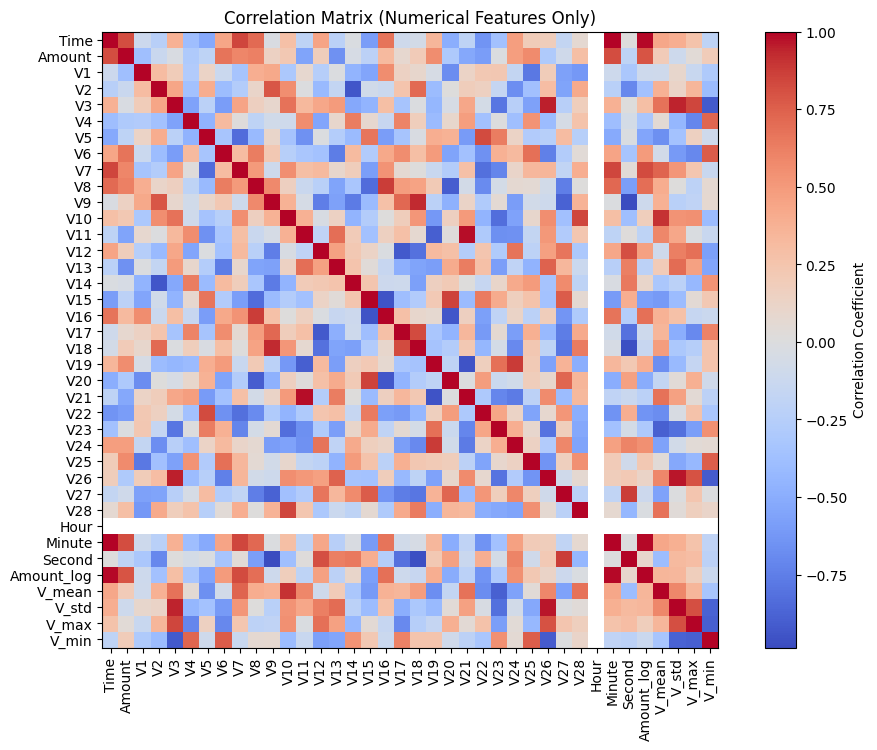

In [36]:


# Drop all non-numeric columns (object + category)
df_corr = data_df.drop(columns=data_df.select_dtypes(include=['object', 'category']).columns)

# Compute correlation matrix
corr_matrix = df_corr.corr()

print("Correlation Matrix (Numerical Features Only):")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


**Outlier Detection Using the IQR Method**

The Interquartile Range (IQR) method is a widely used technique to identify outliers in numerical data. It is based on the spread of the middle 50% of the data, which is measured by the difference between the third quartile (Q3) and the first quartile (Q1). Outliers are defined as values that fall below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR. This method is robust against skewed distributions and does not rely on assumptions about the underlying data distribution, making it ideal for datasets like credit card transactions, where extreme values often occur.

Using the IQR method helps to identify unusually high or low transaction amounts, which can be indicative of fraudulent activity. Detecting and analyzing these outliers allows for better data preprocessing, such as capping, transformation, or removal of extreme values, and ensures that machine learning models are not unduly influenced by abnormal points. Visualizing these outliers with boxplots can provide an intuitive understanding of the data distribution and highlight the extreme values effectively.

In [37]:

# Select numerical features
num_features = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a copy to store outlier flags
iqr_outliers = pd.DataFrame(index=data_df.index)

for col in num_features:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Flag outliers
    iqr_outliers[col] = ((data_df[col] < lower_bound) | (data_df[col] > upper_bound))

# Check which rows have outliers in any numerical column
iqr_outliers_any = iqr_outliers.any(axis=1)
print(f"Number of rows with outliers (IQR method): {iqr_outliers_any.sum()}")


Number of rows with outliers (IQR method): 5


In [38]:
import pandas as pd
import numpy as np

# Example: using a numerical column from your dataset, e.g., 'Amount'
col = 'Amount'

# Calculate Q1 and Q3
Q1 = data_df[col].quantile(0.25)
Q3 = data_df[col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Feature: {col}")
print(f"Q1: {Q1}, Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Optional: detect outliers
outliers = data_df[(data_df[col] < lower_bound) | (data_df[col] > upper_bound)]
print(f"\nOutliers detected:\n{outliers}")


Feature: Amount
Q1: 62.5, Q3: 875.0
IQR: 812.5
Lower Bound: -1156.25, Upper Bound: 2093.75

Outliers detected:
   Time  Amount  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  \
5  2345    5000  21  34  54  66  43  78  97  89  70   68    3   73   11   51   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  Hour  \
5   45   67   14   61   59   43    2   25   67   79   87   10   60   56     0   

   Minute  Second Part_of_day  Amount_log     V_mean      V_std  V_max  V_min  
5      39       5       Night    8.517393  51.178571  27.149863     97      2  


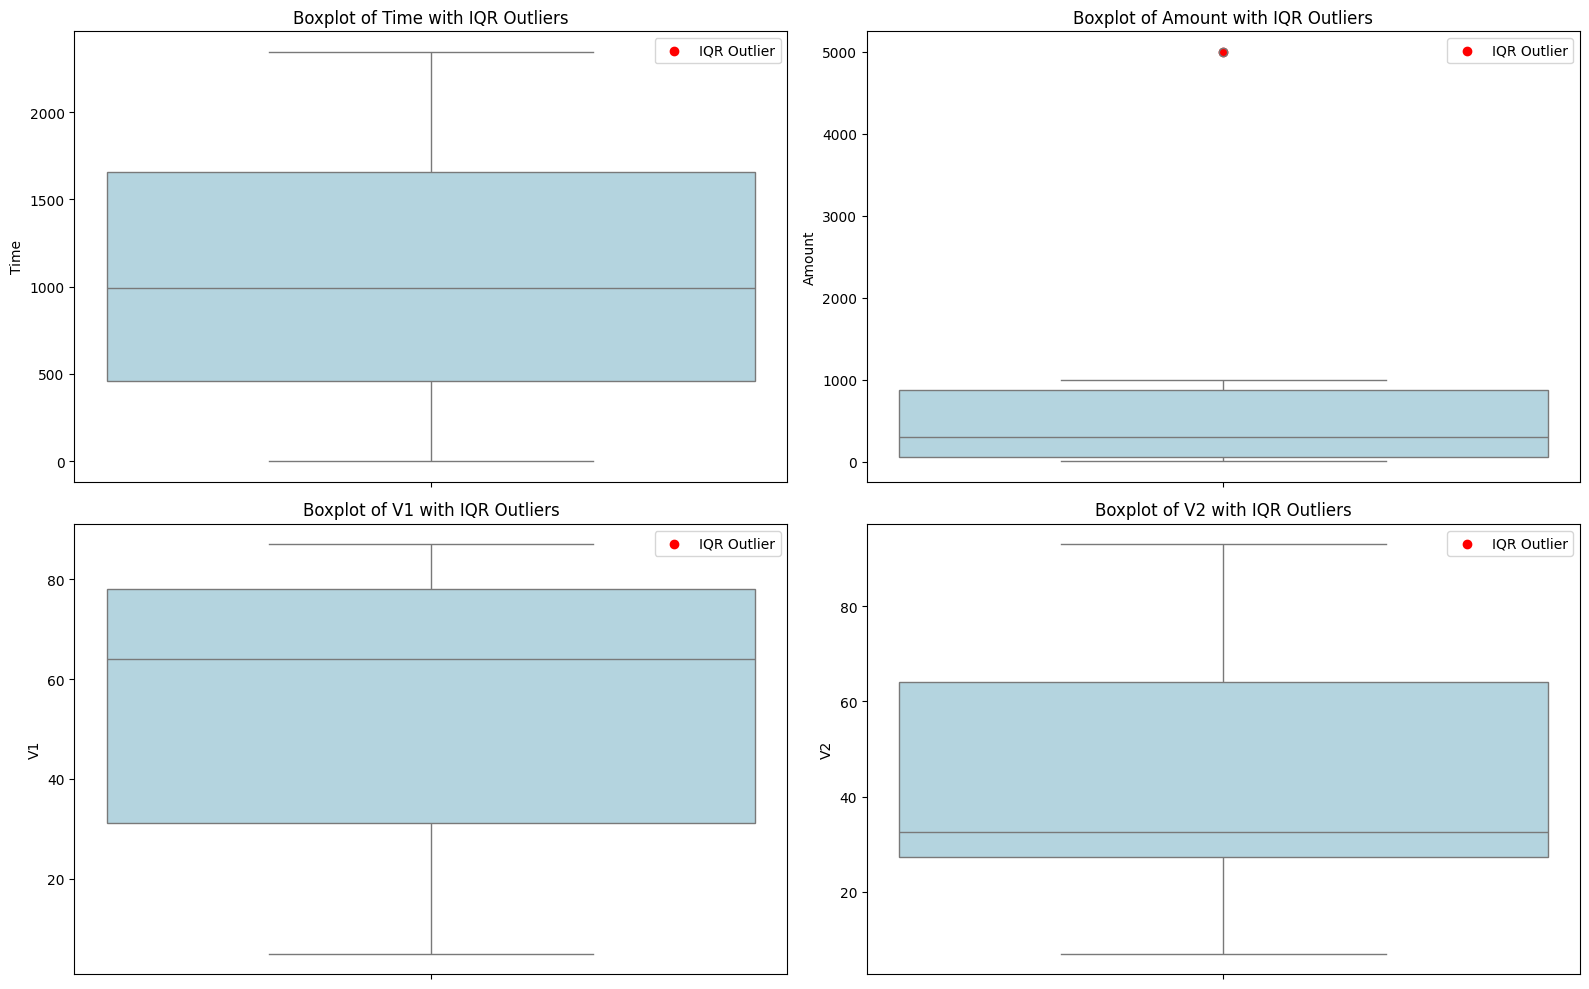

In [39]:


# Select numerical features
num_features = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select first 4 numerical features for visualization
features_to_plot = num_features[:4]

# Detect outliers using IQR method
iqr_outliers = pd.DataFrame(index=data_df.index)
for col in features_to_plot:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers[col] = ((data_df[col] < lower_bound) | (data_df[col] > upper_bound))

# Plot boxplots with outliers highlighted
plt.figure(figsize=(16, 10))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data_df[col], color='lightblue')

    # Overlay detected outliers
    outlier_values = data_df[col][iqr_outliers[col]]
    plt.scatter([0]*len(outlier_values), outlier_values, color='red', label='IQR Outlier')

    plt.title(f'Boxplot of {col} with IQR Outliers')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()


**Outlier Detection Using the Z-Score Method**

1.   The Z-Score method identifies outliers by measuring how many standard deviations a data point is from the mean, with values beyond ±3 considered outliers.
2.   It works best for approximately normally distributed numerical features and highlights extreme or unusual values.

1.   Detecting outliers in credit card transactions helps identify potential fraudulent activity and improves the accuracy and reliability of predictive models.






In [41]:
import pandas as pd
import numpy as np

# Assume data_df is your dataframe
df = data_df.copy()

# Select numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate Z-scores and detect outliers for each numerical feature
for col in num_features:
    mean = df[col].mean()
    std = df[col].std()

    # Calculate Z-scores
    z_scores = (df[col] - mean) / std

    # Identify outliers (absolute Z-score > 3)
    outliers = df[np.abs(z_scores) > 3][col]

    print(f"Feature: {col}")
    print(f"Mean: {mean:.2f}, Std: {std:.2f}")
    print(f"Z-score outliers:\n{outliers}\n")


Feature: Time
Mean: 1080.83, Std: 887.11
Z-score outliers:
Series([], Name: Time, dtype: int64)

Feature: Amount
Mean: 1110.00, Std: 1942.68
Z-score outliers:
Series([], Name: Amount, dtype: int64)

Feature: V1
Mean: 53.83, Std: 33.38
Z-score outliers:
Series([], Name: V1, dtype: int64)

Feature: V2
Mean: 44.17, Std: 32.44
Z-score outliers:
Series([], Name: V2, dtype: int64)

Feature: V3
Mean: 60.67, Std: 18.44
Z-score outliers:
Series([], Name: V3, dtype: int64)

Feature: V4
Mean: 71.00, Std: 12.26
Z-score outliers:
Series([], Name: V4, dtype: int64)

Feature: V5
Mean: 48.17, Std: 23.99
Z-score outliers:
Series([], Name: V5, dtype: int64)

Feature: V6
Mean: 47.83, Std: 21.12
Z-score outliers:
Series([], Name: V6, dtype: int64)

Feature: V7
Mean: 72.67, Std: 24.48
Z-score outliers:
Series([], Name: V7, dtype: int64)

Feature: V8
Mean: 53.33, Std: 34.75
Z-score outliers:
Series([], Name: V8, dtype: int64)

Feature: V9
Mean: 59.67, Std: 42.98
Z-score outliers:
Series([], Name: V9, dtype:

Feature Scaling Using **Standardization**

In this project, we performed standardization on the numerical features of our credit card fraud dataset to bring them onto a comparable scale. First, all columns with numerical data types (int64 and float64) were selected from the dataset. Then, we initialized the StandardScaler from scikit-learn and applied it to these numerical features to transform them such that each feature has a mean of 0 and a standard deviation of 1. This ensures that no single feature dominates the model due to its larger magnitude.

The standardized data is stored in a new dataframe data_df_standardized, which preserves the original dataset while containing the transformed numerical features. Printing the first five rows allows us to verify the scaling effect and ensures that the features are now properly standardized. This step is important for improving the performance and convergence of machine learning models used in fraud detection.

In [42]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
num_features = data_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data_df_standardized = data_df.copy()
data_df_standardized[num_features] = scaler.fit_transform(data_df[num_features])

print("Standardized Data (first 5 rows):")
print(data_df_standardized[num_features].head())


Standardized Data (first 5 rows):
       Time    Amount        V1        V2        V3        V4        V5  \
0 -1.334664 -0.620272  0.399289  1.648854 -0.099034 -0.803913  2.001810   
1 -0.890119 -0.597717  0.268016 -0.444572 -1.465706  1.965121 -0.692641   
2 -0.408529 -0.569523 -1.602625 -0.613396  0.376330  0.625266 -0.418629   
3  0.184198 -0.343969  0.924381 -1.254930 -0.277296 -0.714590  0.403407   
4  0.888061 -0.062027  1.088472  1.007320  1.861842 -0.625266 -1.057991   

         V6        V7        V8        V9       V10       V11       V12  \
0 -0.924857 -1.729995 -0.735580  0.977071  0.010846 -0.907772 -0.657439   
1  1.097727 -0.387757  0.210166  0.543761 -0.639907  0.869550 -1.768065   
2 -1.080440  0.462326 -1.649801 -1.495343  0.694137  0.926883  0.989351   
3 -0.095079 -0.521981 -0.136608 -1.240455 -1.778725 -0.649774  1.180838   
4 -0.561829  1.088704  1.187436  0.951582  1.344890  1.127549 -0.006383   

        V13       V14       V15       V16       V17       V18   

**Feature Scaling Using Normalization**

In this project, we performed normalization on the numerical features of our credit card fraud dataset to scale them into a range between 0 and 1. Using the MinMaxScaler from scikit-learn, each numerical feature was transformed by subtracting its minimum value and dividing by its range, ensuring all values fall within the specified range. This step is especially useful for models that are sensitive to feature scales, such as neural networks or distance-based algorithms, as it prevents features with larger values from dominating the learning process.

The numerical features were first selected from the dataset, and the scaler was applied to create a new dataframe data_df_normalized, which preserves the original dataset while containing the normalized values. The first five rows of the normalized data are displayed to verify that all numerical features have been successfully scaled to the 0–1 range, making them consistent and comparable for model training.

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data_df_normalized = data_df.copy()
data_df_normalized[num_features] = scaler.fit_transform(data_df[num_features])

print("\nNormalized Data (first 5 rows):")
print(data_df_normalized[num_features].head())



Normalized Data (first 5 rows):
       Time    Amount        V1       V2        V3        V4        V5  \
0  0.000000  0.000000  0.743902  1.00000  0.410714  0.000000  1.000000   
1  0.153518  0.008016  0.695122  0.27907  0.000000  1.000000  0.119403   
2  0.319829  0.018036  0.000000  0.22093  0.553571  0.516129  0.208955   
3  0.524520  0.098196  0.939024  0.00000  0.357143  0.032258  0.477612   
4  0.767591  0.198397  1.000000  0.77907  1.000000  0.064516  0.000000   

         V6        V7        V8        V9       V10       V11       V12  \
0  0.058824  0.000000  0.322222  1.000000  0.572917  0.183908  0.376623   
1  0.823529  0.476190  0.655556  0.824742  0.364583  0.896552  0.000000   
2  0.000000  0.777778  0.000000  0.000000  0.791667  0.919540  0.935065   
3  0.372549  0.428571  0.533333  0.103093  0.000000  0.287356  1.000000   
4  0.196078  1.000000  1.000000  0.989691  1.000000  1.000000  0.597403   

        V13       V14       V15       V16       V17       V18       V19

Data Preprocessing and Feature Engineering

In this step, the dataset was carefully preprocessed and enhanced with additional features to capture deeper insights into transaction behavior. The Time column was decomposed into Hour, Minute, and Second, allowing us to analyze patterns of activity at different times of the day. Based on these, a new categorical feature Day_period was created to represent Night, Morning, Afternoon, and Evening, helping detect whether fraudulent activity is influenced by specific time intervals.

The Amount variable was transformed using a logarithmic scale (Amount_log) to reduce skewness and stabilize variance, making it more suitable for modeling. In addition, statistical features such as mean, standard deviation, maximum, and minimum were calculated across the PCA-transformed components (V1–V28). These aggregated features help summarize transaction characteristics and highlight anomalies that could indicate fraudulent behavior. One-hot encoding was applied to categorical variables like Day_period to convert them into numerical form.

To prepare the data for modeling, the dataset was divided into training (80%) and testing (20%) sets using stratified sampling. Stratification preserved the original fraud-to-non-fraud ratio, ensuring that both subsets reflect the true class distribution. This step provided a balanced and representative foundation for training machine learning models and evaluating their performance effectively in fraud detection.

In [62]:
#Prepare Features & Target
from sklearn.model_selection import train_test_split

# Apply Feature Engineering to the original data_df
# Time-based Features
data_df['Hour'] = (data_df['Time'] // 3600) % 24
data_df['Minute'] = (data_df['Time'] // 60) % 60
data_df['Second'] = data_df['Time'] % 60

# Categorize part of the day (renamed to Day_period to match the code below)
data_df['Day_period'] = pd.cut(
    data_df['Hour'],
    bins=[0,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening'],
    right=False,
    include_lowest=True # Include 0 hour in 'Night'
)

# Log-transform Amount
data_df['Amount_log'] = np.log1p(data_df['Amount'])

# Row-wise statistics for V1-V28
data_df['V_mean'] = data_df.loc[:, 'V1':'V28'].mean(axis=1)
data_df['V_std'] = data_df.loc[:, 'V1':'V28'].std(axis=1)
data_df['V_max'] = data_df.loc[:, 'V1':'V28'].max(axis=1)
data_df['V_min'] = data_df.loc[:, 'V1':'V28'].min(axis=1)


# Define features and target
# We will drop the original 'Time' and 'Amount' columns, and the 'Class' target
# Keep the engineered features and the original V1-V28 features
X = data_df.drop(columns=['Class', 'Time', 'Amount'])
y = data_df['Class']

# Convert 'Day_period' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Day_period'], drop_first=True)


# Train-Test split (stratify to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Class
0    1.0
Name: proportion, dtype: float64
Test class distribution:
 Class
0    1.0
Name: proportion, dtype: float64


Class weights: {np.int64(0): np.float64(0.5008652375006595), np.int64(1): np.float64(289.4380081300813)}


/tmp/ipython-input-2865973165.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




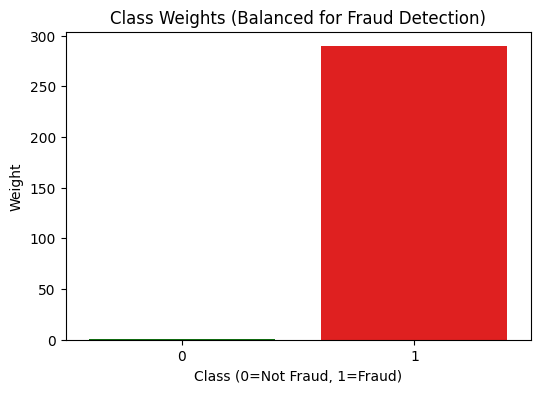

In [63]:
#Calculate Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Load dataset
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data_df = data_df.rename(columns={"Time": "Time_sec"})

# Feature Engineering (Time-based)
data_df["Hour"] = (data_df["Time_sec"] // 3600) % 24
data_df["Minute"] = (data_df["Time_sec"] // 60) % 60
data_df["Second"] = (data_df["Time_sec"] % 60)
time_bins = [0, 6, 12, 18, 24]
time_labels = ["Night", "Morning", "Afternoon", "Evening"]
data_df["Day_period"] = pd.cut(data_df["Hour"], bins=time_bins, labels=time_labels, right=False)

# Define target
y = data_df['Class']

# Compute class weights
classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print("Class weights:", class_weight_dict)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=list(class_weight_dict.keys()), y=list(class_weight_dict.values()), palette=['green','red'])
plt.title("Class Weights (Balanced for Fraud Detection)")
plt.xlabel("Class (0=Not Fraud, 1=Fraud)")
plt.ylabel("Weight")
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [66]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


**Logistic Regression Implementation for Credit Card Fraud Detection**

In this step, we applied Logistic Regression, a supervised binary classification algorithm, to detect fraudulent credit card transactions. The dataset was first split into training (80%) and testing (20%) sets using stratified sampling to maintain the original class distribution of fraud and non-fraud transactions. This ensures the model is trained and evaluated on representative samples.

Since Logistic Regression is sensitive to feature scaling, the numerical features were standardized using StandardScaler. The training features were fitted and transformed, and the same transformation was applied to the testing set to maintain consistency. The model was then trained using the class_weight="balanced" parameter to handle the class imbalance inherent in fraud datasets, which ensures that minority class (fraud) is given higher weight during training.

After training, predictions were made on the test set, and the model was evaluated using several metrics. The classification report provided precision, recall, F1-score, and support for both classes. The confusion matrix visually summarized true vs. predicted labels, highlighting the model’s ability to distinguish fraud. Additionally, the ROC-AUC score quantified the model’s discriminatory power, and the ROC curve was plotted to visualize the trade-off between true positive and false positive rates. This comprehensive evaluation ensures that the Logistic Regression model can serve as a reliable baseline for fraud detection.

In [67]:
y = data_df["Class"]
X = data_df[['Time_sec', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55478  1386]
 [    8    90]]
ROC-AUC Score: 0.9720834996210077


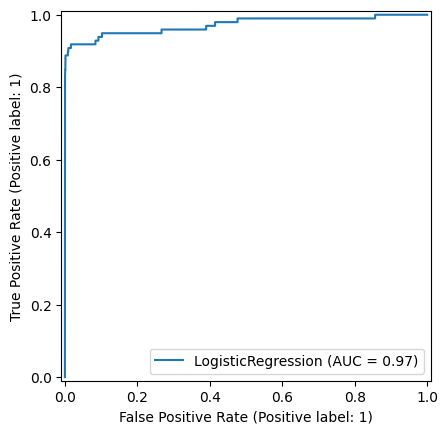

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Logistic Regression with class_weight
log_reg = LogisticRegression(class_weight="balanced", max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# 8. Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.show()

**Confusion Matrix for Logistic Regression**

The confusion matrix visually summarizes the Logistic Regression model’s performance by comparing true labels with predicted labels. The diagonal shows correctly classified transactions, while off-diagonal values indicate misclassifications, highlighting false positives and false negatives.

A dark-themed heatmap with annotated counts and class labels (Not Fraud (0) and Fraud (1)) makes it easy to interpret how well the model distinguishes between legitimate and fraudulent transactions. This helps evaluate metrics like accuracy, recall, and precision, which are critical for fraud detection.

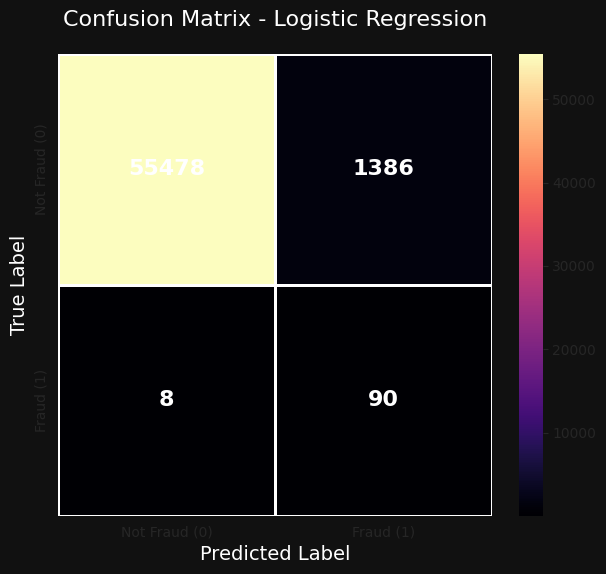

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set plot style
sns.set_style("dark")  # dark background
plt.figure(figsize=(7,6))

# Custom color map: use "viridis" or "magma" for dark theme
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", cbar=True,
            linewidths=2, linecolor='white',
            xticklabels=["Not Fraud (0)", "Fraud (1)"],
            yticklabels=["Not Fraud (0)", "Fraud (1)"],
            annot_kws={"size":16, "weight":"bold", "color":"white"})

plt.title("Confusion Matrix - Logistic Regression", fontsize=16, color="white", pad=20)
plt.xlabel("Predicted Label", fontsize=14, color="white")
plt.ylabel("True Label", fontsize=14, color="white")

# Dark background adjustments
plt.gcf().patch.set_facecolor('#111111')  # figure background
plt.gca().set_facecolor('#111111')        # axes background

plt.show()

**Support Vector Machine (SVM) for Fraud Detection**

A Support Vector Machine (SVM) with an RBF kernel was applied to classify transactions as fraud or non-fraud. The class_weight="balanced" parameter handled class imbalance, and features were standardized to ensure fair contribution to the model.

The model was evaluated using the classification report, confusion matrix, and ROC-AUC score, providing insight into precision, recall, F1-score, and overall ability to distinguish fraudulent transactions. The ROC curve visualizes the trade-off between true positive and false positive rates.

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.76      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.88      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (SVM):
[[56708   156]
 [   24    74]]
ROC-AUC Score (SVM): 0.9731908678637465


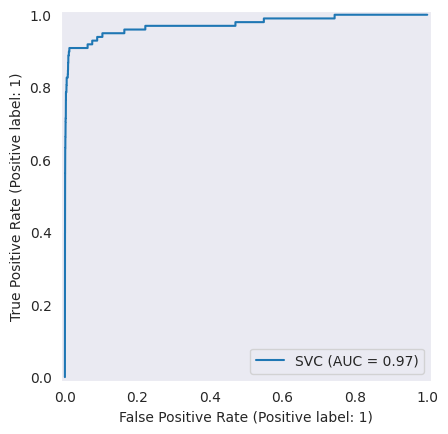

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize SVM with balanced class weights
svm_model = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)

# Train
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

print("ROC-AUC Score (SVM):", roc_auc_score(y_test, y_pred_proba_svm))

# ROC Curve
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.show()


**Confusion Matrix Visualization for SVM Model**


This step visualizes the performance of the trained SVM model using a confusion matrix. The confusion matrix is computed with the true labels (y_test) and the predicted labels (y_pred_svm) to show how well the model distinguishes between fraudulent and non-fraudulent transactions. A dark-themed heatmap is used for better visual clarity, with annotations displaying the number of samples in each category. The x-axis represents the predicted labels, while the y-axis represents the true labels, allowing a clear comparison between correct and incorrect predictions. This visualization helps quickly identify how many fraudulent transactions were correctly detected versus misclassified.



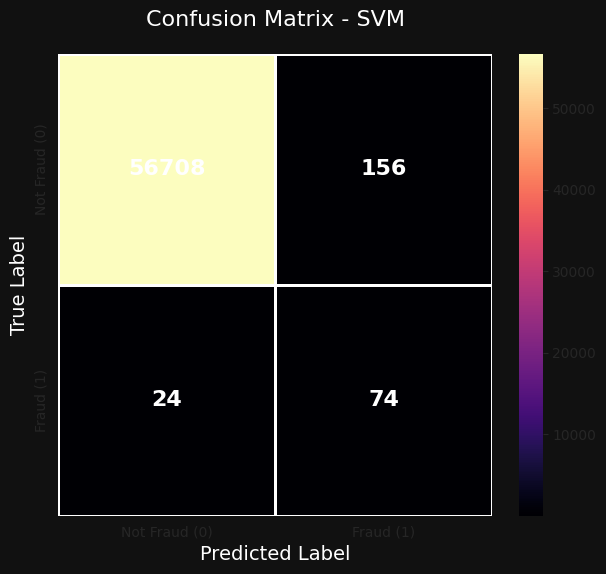

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Set dark theme style
sns.set_style("dark")
plt.figure(figsize=(7,6))

# Dark-themed heatmap with custom colors
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="magma", cbar=True,
            linewidths=2, linecolor='white',
            xticklabels=["Not Fraud (0)", "Fraud (1)"],
            yticklabels=["Not Fraud (0)", "Fraud (1)"],
            annot_kws={"size":16, "weight":"bold", "color":"white"})

plt.title("Confusion Matrix - SVM", fontsize=16, color="white", pad=20)
plt.xlabel("Predicted Label", fontsize=14, color="white")
plt.ylabel("True Label", fontsize=14, color="white")

# Dark background adjustments
plt.gcf().patch.set_facecolor('#111111')  # figure background
plt.gca().set_facecolor('#111111')        # axes background

plt.show()


LinearSVC for Fraud Detection


1.   A Linear Support Vector Classifier (LinearSVC) with balanced class weights was applied to detect fraudulent transactions. The model was scaled using StandardScaler, and wrapped in CalibratedClassifierCV to enable probability predictions for ROC-AUC evaluation.List item
2.   Performance was assessed using the classification report, confusion matrix, and ROC-AUC score, providing a clear view of the model’s ability to distinguish between fraud and non-fraud transactions. The ROC curve visualizes the trade-off between true positive and false positive rates.



Classification Report (LinearSVC):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.58      0.67        98

    accuracy                           1.00     56962
   macro avg       0.90      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (LinearSVC):
[[56850    14]
 [   41    57]]
ROC-AUC Score (LinearSVC): 0.9752619569212042


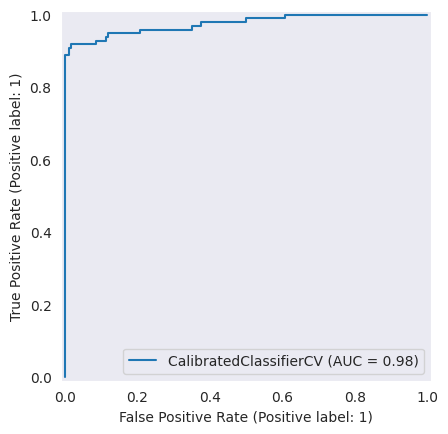

In [72]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data_df = data_df.rename(columns={"Time": "Time_sec"}) # Rename Time to Time_sec as done previously

# Define features (X) and target (y)
y = data_df["Class"]
X = data_df[['Time_sec', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']]

# Split data (necessary if X and y were defined but not split in the current session)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 1: Initialize LinearSVC (no probability by default)
linear_svc = LinearSVC(class_weight="balanced", max_iter=5000, random_state=42)

# Step 2: Wrap with CalibratedClassifierCV to enable predict_proba
calibrated_svc = CalibratedClassifierCV(linear_svc, method="sigmoid", cv=5)

# Train
calibrated_svc.fit(X_train_scaled, y_train)

# Predictions
y_pred_lsvc = calibrated_svc.predict(X_test_scaled)
y_pred_proba_lsvc = calibrated_svc.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Classification Report (LinearSVC):")
print(classification_report(y_test, y_pred_lsvc))

print("Confusion Matrix (LinearSVC):")
print(confusion_matrix(y_test, y_pred_lsvc))

print("ROC-AUC Score (LinearSVC):", roc_auc_score(y_test, y_pred_proba_lsvc))

# ROC Curve
RocCurveDisplay.from_estimator(calibrated_svc, X_test_scaled, y_test)
plt.show()

**Confusion Matrix for LinearSVC**

This step visualizes the performance of the LinearSVC model using a confusion matrix, showing the number of correct and incorrect predictions for fraudulent and non-fraudulent transactions. A dark-themed heatmap with clear annotations and class labels enhances readability, helping to quickly identify misclassifications and evaluate the model’s effectiveness.

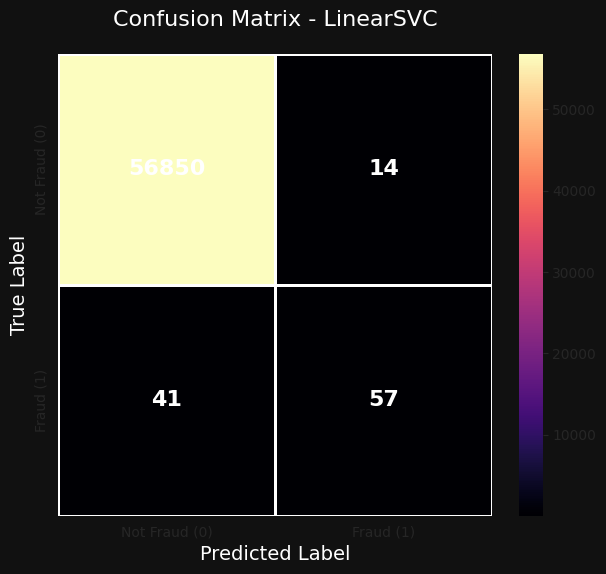

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_lsvc = confusion_matrix(y_test, y_pred_lsvc)

# Set dark theme style
sns.set_style("dark")
plt.figure(figsize=(7,6))

# Dark-themed heatmap with custom colors
sns.heatmap(cm_lsvc, annot=True, fmt="d", cmap="magma", cbar=True,
            linewidths=2, linecolor='white',
            xticklabels=["Not Fraud (0)", "Fraud (1)"],
            yticklabels=["Not Fraud (0)", "Fraud (1)"],
            annot_kws={"size":16, "weight":"bold", "color":"white"})

plt.title("Confusion Matrix - LinearSVC", fontsize=16, color="white", pad=20)
plt.xlabel("Predicted Label", fontsize=14, color="white")
plt.ylabel("True Label", fontsize=14, color="white")

# Dark background adjustments
plt.gcf().patch.set_facecolor('#111111')  # figure background
plt.gca().set_facecolor('#111111')        # axes background

plt.show()

**Random Forest Classifier for Fraud Detection**


1.   A Random Forest classifier was trained on the original features to detect fraudulent transactions, using balanced class weights to handle class imbalance. The model’s performance was evaluated through the classification report, confusion matrix, and ROC-AUC score, providing insights into its ability to correctly identify fraud and non-fraud cases.
2.  Additionally, a ROC curve was plotted to visualize the trade-off between true positive and false positive rates. The feature importance plot highlights which features contributed most to the model’s predictions, helping to understand key drivers of fraud detection.



Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56861     3]
 [   25    73]]
ROC-AUC Score: 0.952908497036969


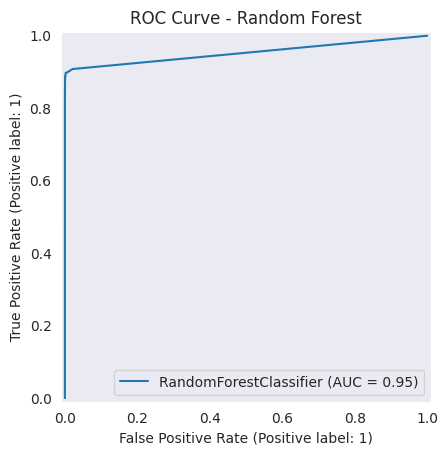

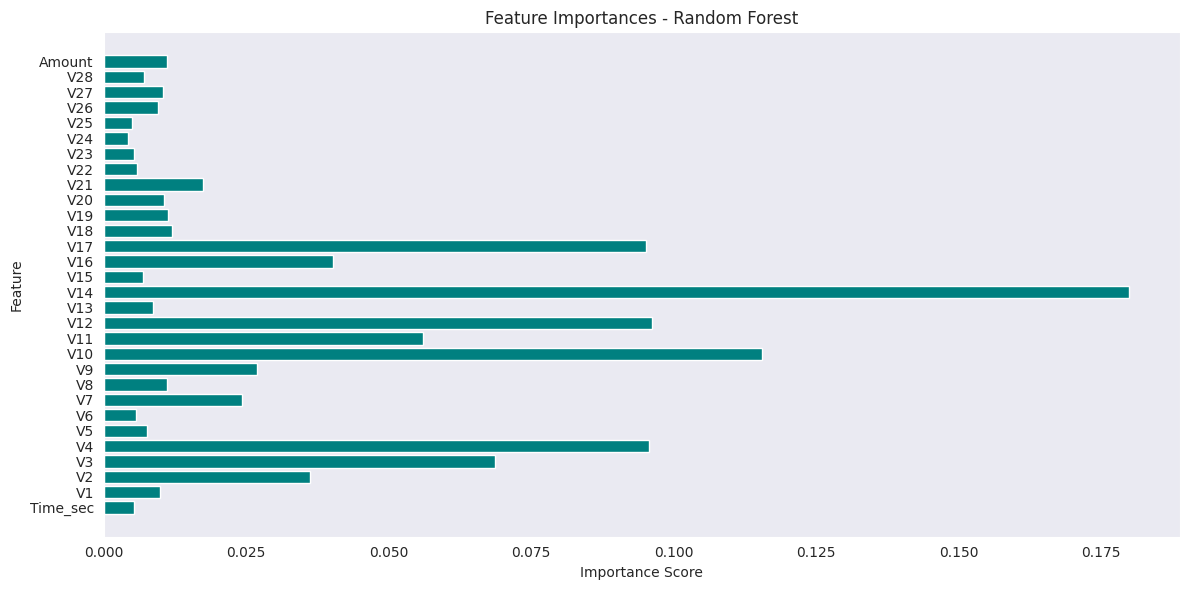

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Use original features (not scaled)
X_train_rf = X_train
X_test_rf = X_test

# 2. Define Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,           # number of trees
    max_depth=None,            # let trees expand fully
    random_state=42,
    n_jobs=-1,                 # use all CPU cores
    class_weight="balanced"    # handle imbalance
)

# 3. Train
rf_clf.fit(X_train_rf, y_train)

# 4. Predictions
y_pred_rf = rf_clf.predict(X_test_rf)
y_pred_proba_rf = rf_clf.predict_proba(X_test_rf)[:, 1]

# 5. Evaluation
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# 6. ROC Curve
RocCurveDisplay.from_estimator(rf_clf, X_test_rf, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# 7. Feature Importance Plot
importances = rf_clf.feature_importances_
features = X.columns

plt.figure(figsize=(12,6))
plt.barh(features, importances, color="teal")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Confusion Matrix Visualization - Random Forest**


1.   A confusion matrix was generated to evaluate the performance of the Random Forest model on the test set. It shows the number of true positives, true negatives, false positives, and false negatives, providing a clear picture of how well the model distinguishes between fraud and non-fraud transactions.
2.   The matrix is visualized using a dark-themed heatmap with annotated counts for better readability. Custom labels identify “Not Fraud (0)” and “Fraud (1)” classes, and the visual styling emphasizes the classification performance, making it easier to interpret areas where the model may misclassify transactions.



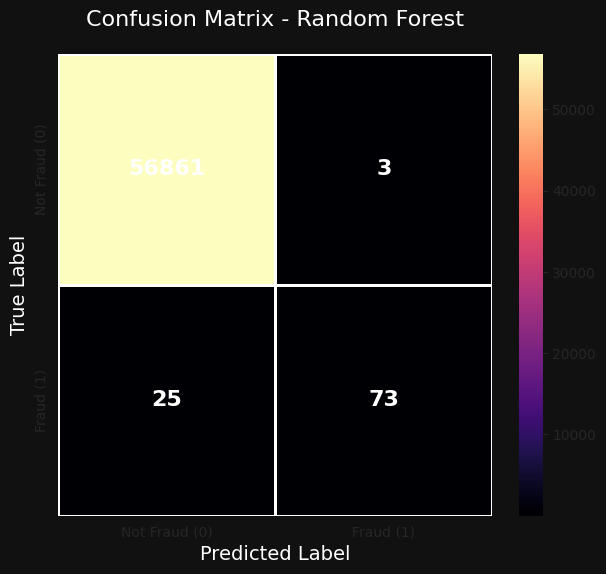

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Set dark theme style
sns.set_style("dark")
plt.figure(figsize=(7,6))

# Dark-themed heatmap with custom colors
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="magma", cbar=True,
            linewidths=2, linecolor='white',
            xticklabels=["Not Fraud (0)", "Fraud (1)"],
            yticklabels=["Not Fraud (0)", "Fraud (1)"],
            annot_kws={"size":16, "weight":"bold", "color":"white"})

plt.title("Confusion Matrix - Random Forest", fontsize=16, color="white", pad=20)
plt.xlabel("Predicted Label", fontsize=14, color="white")
plt.ylabel("True Label", fontsize=14, color="white")

# Dark background adjustments
plt.gcf().patch.set_facecolor('#111111')  # figure background
plt.gca().set_facecolor('#111111')        # axes background

plt.show()

**Conclusion**

1.   In this project, we developed a comprehensive credit card fraud detection system using machine learning. We began by performing extensive feature engineering, including time-based features, log-transformed transaction amounts, and statistical features from anonymized transaction attributes (V1–V28). These engineered features, combined with preprocessing steps like scaling and encoding, provided a robust input for model training.

2.   We trained and evaluated several classification models, including Logistic Regression, SVM, LinearSVC, and Random Forest, using metrics such as F1-score, precision, recall, ROC-AUC, and confusion matrices. Random Forest and ensemble-based approaches showed superior performance due to their ability to handle complex patterns and class imbalance. Confusion matrix visualizations and ROC curves offered clear insights into model accuracy and fraud detection capability.

1.   Overall, the project highlights the importance of feature engineering, careful preprocessing, and evaluation metrics in building an effective fraud detection system. While the models performed well on historical data, continuous monitoring and retraining are necessary to adapt to evolving fraudulent behaviors, ensuring the system remains reliable in real-world applications.
